<a href="https://colab.research.google.com/github/Nyillu/Algorithms_Big_Data_Zavadskaya/blob/main/data_curation.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Data curation

This notebook presents cleaning the dataset obtained in the previous stages in accordance with next steps:

- [ ] dealing with duplicates
- [ ] outlier detection

**Missing values** were filled in the previous hometask. Also in this notebook theare is normalization of descriptors.

This code is made to be run locally within current repository. If you work in Google Colab, adjust the path to the `data_with_descriptors.csv` file accordingly and install the libraries provided in the *requirements*.

The **result of working** in this notepad is `data_final` and `data_normalized.csv` files.




# Requirements

In [3]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
import numpy as np

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [4]:
df = pd.read_csv('/content/drive/MyDrive/Big data/data_clean.csv')

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19616 entries, 0 to 19615
Columns: 206 entries, smiles to TopoShapeIndex
dtypes: float64(205), object(1)
memory usage: 30.8+ MB


# Dealing with duplicates

- remove duplicates in the smiles and gap columns
- check if there are duplicates only in the `smiles` column (with different gaps)

In [6]:
df_drop = df.drop_duplicates(subset=['smiles', 'gap'], keep='first')

In [7]:
len(df_drop)

19614

In [8]:
df_drop.duplicated(subset=['smiles']).sum()

0





# Outlier detection

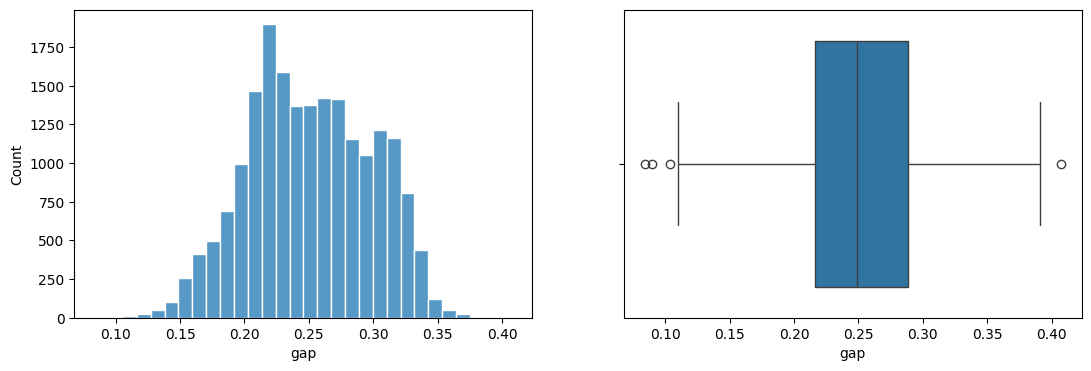

In [9]:
fig, axs = plt.subplots(ncols=2, figsize=(13, 4))
sns.set_style('whitegrid')
sns.histplot(df_drop['gap'], kde = False, bins = 30, ax=axs[0])
sns.boxplot(x=df_drop['gap'], ax=axs[1])
plt.show()

In [10]:
Q1 = df_drop['gap'].quantile(0.25)
Q3 = df_drop['gap'].quantile(0.75)
IQR = Q3 - Q1

filter = (df_drop['gap'] >= Q1 - 1.5 * IQR) & (df_drop['gap'] <= Q3 + 1.5 *IQR)
final_dataset= df_drop.loc[filter]

In [11]:
final_dataset.info()

<class 'pandas.core.frame.DataFrame'>
Index: 19610 entries, 0 to 19615
Columns: 206 entries, smiles to TopoShapeIndex
dtypes: float64(205), object(1)
memory usage: 31.0+ MB


In [12]:
final_dataset.to_csv('/content/drive/MyDrive/Big data/data_final.csv', index = False)

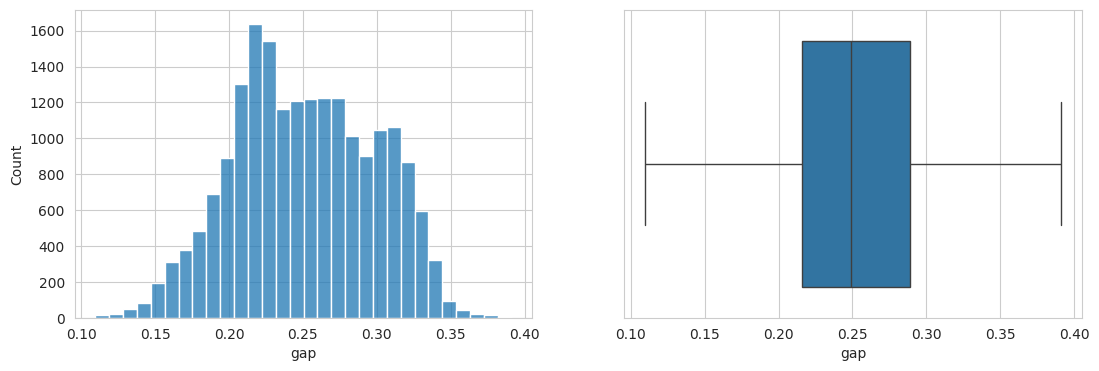

In [13]:
fig, axs = plt.subplots(ncols=2, figsize=(13, 4))
sns.set_style('whitegrid')
sns.histplot(final_dataset['gap'], kde = False, bins = 30, ax=axs[0])
sns.boxplot(x=final_dataset['gap'], ax=axs[1])
plt.show()

We can also see here that our **target value** in the dataset has a **normal distribution**. This means we don’t have to convert it for further use.

In [14]:
from sklearn.preprocessing import MinMaxScaler

In [15]:
final_dataset.describe()

,gap,A,B,mu,alpha,u0,cv,MaxAbsEStateIndex,MinAbsEStateIndex,MinEStateIndex,...,n4HRing,n6aRing,n5FRing,n6FRing,n7FRing,n8FRing,n9FRing,GGI4,Radius,TopoShapeIndex
count,19610.000000,19610.000000,19610.000000,19610.000000,19610.000000,19610.000000,19610.000000,19610.000000,19610.000000,19610.000000,...,19610.000000,19610.000000,19610.000000,19610.000000,19610.000000,19610.000000,19610.000000,19610.000000,19610.000000,19610.000000
mean,0.251092,3.404947,1.383476,2.679649,75.495508,-411.839945,31.636443,8.236551,0.290395,-0.014959,...,0.305354,0.050739,0.092606,0.121061,0.106935,0.078225,0.035441,0.218598,2.749567,0.754092
std,0.047566,1.388464,0.422550,1.497527,7.799960,38.444297,3.934644,2.470110,0.259508,0.568602,...,0.648930,0.219471,0.290765,0.326206,0.309039,0.268533,0.184897,0.122543,0.512833,0.236319
min,0.109600,0.000000,0.340580,0.000000,37.520000,-605.316836,15.138000,1.500000,0.000000,-4.802569,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2.000000,0.000000
25%,0.216100,2.556497,1.086655,1.572175,70.652500,-437.895664,28.979000,5.545961,0.085648,-0.352431,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.125000,2.000000,0.666667
50%,0.249100,3.094425,1.363865,2.466750,75.660000,-416.844866,31.561000,9.009705,0.215231,0.009352,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.222222,3.000000,0.666667
75%,0.288700,3.820110,1.651780,3.604100,80.630000,-387.057371,34.240250,10.270446,0.421296,0.372106,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.316111,3.000000,1.000000
max,0.391200,54.351210,6.096720,21.512000,127.460000,-233.249538,46.267000,12.690741,1.694444,1.694444,...,6.000000,1.000000,2.000000,1.000000,1.000000,1.000000,1.000000,0.722222,4.000000,1.000000


In [16]:
df_normalized = df.copy()

scaler = MinMaxScaler()

columns_to_normalize = df_normalized.columns.difference(['gap', 'smiles'])

df_normalized[columns_to_normalize] = scaler.fit_transform(df_normalized[columns_to_normalize])

In [17]:
df_normalized.to_csv('/content/drive/MyDrive/Big data/data_normalized.csv', index = False)

In [21]:
df_normalized.describe()

,gap,A,B,mu,alpha,u0,cv,MaxAbsEStateIndex,MinAbsEStateIndex,MinEStateIndex,...,n4HRing,n6aRing,n5FRing,n6FRing,n7FRing,n8FRing,n9FRing,GGI4,Radius,TopoShapeIndex
count,19616.000000,19616.000000,19616.000000,19616.000000,19616.000000,19616.000000,19616.000000,19616.000000,19616.000000,19616.000000,...,19616.000000,19616.000000,19616.000000,19616.000000,19616.000000,19616.000000,19616.000000,19616.000000,19616.000000,19616.000000
mean,0.251069,0.062650,0.181179,0.124572,0.422234,0.519983,0.529975,0.601952,0.171410,0.736874,...,0.050877,0.050877,0.046289,0.121024,0.106903,0.078201,0.035532,0.302658,0.374822,0.754049
std,0.047616,0.025544,0.073423,0.069647,0.086717,0.103352,0.126407,0.220765,0.153167,0.087625,...,0.108142,0.219752,0.145362,0.326163,0.308997,0.268495,0.185125,0.169672,0.256387,0.236378
min,0.084100,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.216100,0.047037,0.129609,0.073080,0.368440,0.449975,0.444626,0.361472,0.050546,0.684951,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.173077,0.000000,0.666667
50%,0.249100,0.056936,0.177768,0.114657,0.424060,0.506550,0.527547,0.671064,0.127049,0.740636,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.307692,0.500000,0.666667
75%,0.288700,0.070295,0.227806,0.167541,0.479320,0.586613,0.613600,0.783733,0.248634,0.796471,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.437692,0.500000,1.000000
max,0.407400,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
